In [1]:
#Import libraries for simulation
import tensorflow as tf
import numpy as np

#Imports for visualization
import PIL.Image
from io import BytesIO
from IPython.display import clear_output, Image, display

In [2]:
def DisplayArray(a, fmt='jpeg', rng=[0,1]):
    a = (a-rng[0])/float(rng[1] - rng[0])*255
    a = np.uint8(np.clip(a,0,255))
    f= BytesIO()
    PIL.Image.fromarray(a).save(f,fmt)
    clear_output(wait = True)
    display(Image(data=f.getvalue()))

In [3]:
sess= tf.InteractiveSession()

In [4]:
def make_kernel(a):
    a=np.asarray(a)
    a = a.reshape(list(a.shape) + [1,1])
    return tf.constant(a,dtype=1)
def simple_conv(x,k):
    x = tf.expand_dims(tf.expand_dims(x,0), -1)
    y = tf.nn.depthwise_conv2d(x,k,[1,1,1,1], padding='SAME')
    return y[0,:,:,0]
def laplace(x):
    laplace_k = make_kernel([[0.5, 1.0, 0.5],
                           [1.0, -6., 1.0],
                           [0.5, 1.0, 0.5]])
    return simple_conv(x, laplace_k)


In [5]:
N=500

In [6]:

u_init = np.zeros([N, N], dtype=np.float32)
ut_init = np.zeros([N, N], dtype=np.float32)

In [7]:
for n in range(40):
  a,b = np.random.randint(0, N, 2)
  u_init[a,b] = np.random.uniform()

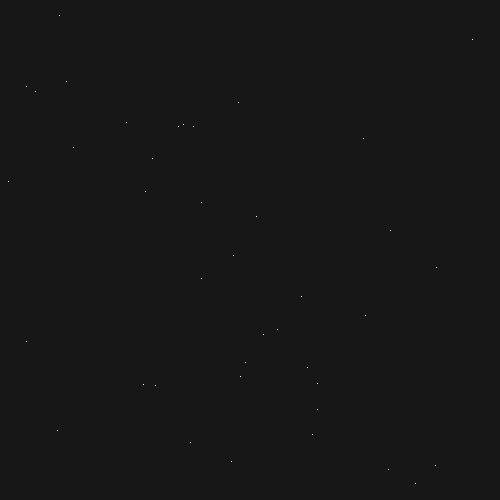

In [23]:
DisplayArray(u_init, rng=[-0.0001, 0.001])

In [24]:
eps = tf.placeholder(tf.float32, shape=())
damping = tf.placeholder(tf.float32, shape=())

In [25]:
U  = tf.Variable(u_init)
Ut = tf.Variable(ut_init)

In [26]:
U_ = U + eps * Ut
Ut_ = Ut + eps * (laplace(U) - damping * Ut)

In [27]:
step = tf.group(
  U.assign(U_),
  Ut.assign(Ut_))

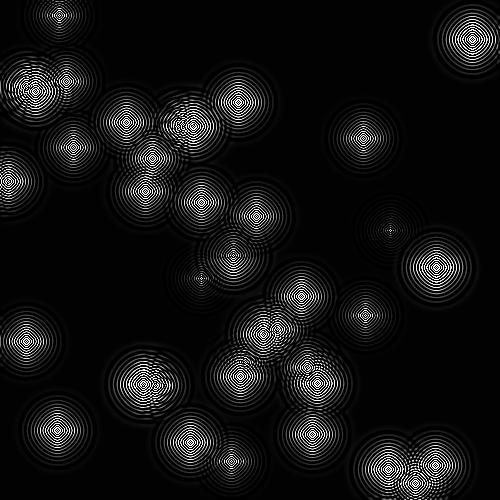

In [29]:
tf.global_variables_initializer().run()
for i in range(1000):
  # Step simulation
  step.run({eps: 0.03, damping: 0.04})
  DisplayArray(U.eval(), rng=[-0.001, 0.1])
